In [1]:
import pickle
import pandas as pd
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.models import Model
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
pickle_loc=('preprocessed_files.pkl')
data=pd.read_pickle(pickle_loc)


In [3]:
data.keys()

dict_keys(['X_train', 'X_test', 'y_smile_train', 'y_smile_test', 'y_gender_train', 'y_gender_test'])

In [4]:
X_train=data['X_train']
X_test=data['X_test']
y_smile_train=data['y_smile_train']
y_smile_test=data['y_smile_test']
y_gender_train=data['y_gender_train']
y_gender_test=data['y_gender_test']

In [5]:
X_train.shape

(120000, 90, 90, 1)

In [6]:
y_smile_train=np.array(y_smile_train)

In [7]:
input_layer=Input(shape=(90,90,1),name='input_layer')
conv1=Conv2D(32,(3,3),activation='relu')(input_layer)
max1=MaxPooling2D((2,2))(conv1)
dropout=Dropout(0.2)(max1)
conv2=Conv2D(64,(3,3),activation='relu')(dropout)
max2=MaxPooling2D((2,2))(conv2)
dropout2=Dropout(0.2)(max2)
conv3=Conv2D(64,(3,3),activation='relu')(dropout2)
flatten=Flatten()(conv3)
dense=Dense(128,activation='relu')(flatten)

In [8]:
dropout3=Dropout(0.2)(dense)
smile_dense=Dense(128,activation='relu')(dropout3)
smile=Dense(1, activation='sigmoid',name='smile')(smile_dense)

In [9]:
dropout4=Dropout(0.2)(dense)
gender_dense=Dense(128,activation='relu')(dropout4)
gender=Dense(1, activation='sigmoid',name='gender')(gender_dense)

In [10]:
model=Model(inputs=input_layer,outputs=[smile,gender])

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics={'smile':'accuracy','gender':'accuracy'})

In [12]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 90, 90, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 88, 88,    │        320 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 44, 44,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 44, 44,    │          0 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 42, 42,    │     18,496 │ dropout[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 21, 21,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 21, 21,    │          0 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 19, 19,    │     36,928 │ dropout_1[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 23104)     │          0 │ conv2d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │  2,957,440 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     16,512 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │     16,512 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ smile (Dense)       │ (None, 1)         │        129 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gender (Dense)      │ (None, 1)         │        129 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,046,466 (11.62 MB)

 Trainable params: 3,046,466 (11.62 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history=model.fit(X_train,[y_smile_train,
                   y_gender_train],
                   epochs=15,
                   validation_data=(X_test,
                                    {'smile':y_smile_test,
                                     'gender':y_gender_test}),
                                     batch_size=32)

Epoch 1/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 129s 34ms/step - gender_accuracy: 0.6507 - gender_loss: 0.6198 - loss: 1.2785 - smile_accuracy: 0.5921 - smile_loss: 0.6587 - val_gender_accuracy: 0.8263 - val_gender_loss: 1.8701 - val_loss: 3.5871 - val_smile_accuracy: 0.8032 - val_smile_loss: 1.7131
Epoch 2/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 127s 34ms/step - gender_accuracy: 0.7919 - gender_loss: 0.4376 - loss: 0.9364 - smile_accuracy: 0.7509 - smile_loss: 0.4988 - val_gender_accuracy: 0.8810 - val_gender_loss: 2.2349 - val_loss: 3.9064 - val_smile_accuracy: 0.8322 - val_smile_loss: 1.6671
Epoch 3/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 127s 34ms/step - gender_accuracy: 0.8411 - gender_loss: 0.3476 - loss: 0.7732 - smile_accuracy: 0.7993 - smile_loss: 0.4256 - val_gender_accuracy: 0.8910 - val_gender_loss: 2.4768 - val_loss: 4.3065 - val_smile_accuracy: 0.8533 - val_smile_loss: 1.8239
Epoch 4/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 126s 34ms/step - gender_accuracy: 0.8637 - gender_loss: 0.3072 - loss: 0.

In [14]:
results = model.evaluate(X_test,[y_smile_test,y_gender_test])

188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - gender_accuracy: 0.9042 - gender_loss: 0.2558 - loss: 0.5936 - smile_accuracy: 0.8792 - smile_loss: 0.3378


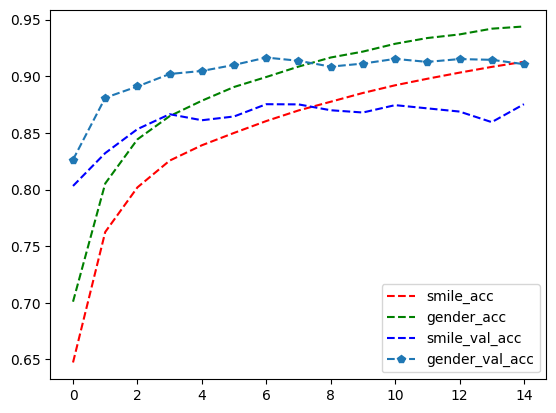

In [15]:
#getting history data for plot
smile_training_acc=history.history['smile_accuracy']
gender_training_acc=history.history['gender_accuracy']
val_acc_smile=history.history['val_smile_accuracy']
val_acc_gender=history.history['val_gender_accuracy']

# count # of epochs
epoch=range(15)

# viz plot
plt.plot(epoch,smile_training_acc, 'r--')
plt.plot(epoch, gender_training_acc, 'g--')
plt.plot(epoch,val_acc_smile,'b--')
plt.plot(epoch, val_acc_gender,'p--')
plt.legend(['smile_acc','gender_acc','smile_val_acc','gender_val_acc'])
plt.show()


In [16]:
X_test.shape

(6000, 90, 90, 1)

In [17]:
prediction=model.predict(X_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [18]:
np.array(prediction).shape

(2, 6000, 1)

In [19]:
prediction=np.array(prediction)

In [20]:
prediction

array([[[9.99930322e-01],
        [9.99999881e-01],
        [8.60875919e-02],
        ...,
        [3.18789098e-04],
        [9.49546695e-01],
        [8.48967791e-01]],

       [[1.22849084e-01],
        [3.49353746e-09],
        [9.77641642e-01],
        ...,
        [6.65777968e-03],
        [8.31705451e-01],
        [9.99912441e-01]]], dtype=float32)

In [21]:
prediction2=prediction[:,:,0]

In [22]:
prediction2.shape

(2, 6000)

In [23]:
prediction2=prediction2.transpose()

In [24]:
prediction2

array([[9.99930322e-01, 1.22849084e-01],
       [9.99999881e-01, 3.49353746e-09],
       [8.60875919e-02, 9.77641642e-01],
       ...,
       [3.18789098e-04, 6.65777968e-03],
       [9.49546695e-01, 8.31705451e-01],
       [8.48967791e-01, 9.99912441e-01]], dtype=float32)

In [25]:
predictions_df = pd.DataFrame(data=prediction2)
predictions_df = round(predictions_df,0)
predictions_df

,0,1
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
5995,1.0,1.0
5996,1.0,1.0
5997,0.0,0.0
5998,1.0,1.0


In [26]:
y_smile_test

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [27]:
# print(classification_report(y_hat_test,predictions_df['hat']))

In [28]:
print(classification_report(y_smile_test,predictions_df[0]))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      3188
           1       0.89      0.84      0.86      2812

    accuracy                           0.88      6000
   macro avg       0.88      0.87      0.87      6000
weighted avg       0.88      0.88      0.88      6000



In [29]:
print(classification_report(y_gender_test,predictions_df[1]))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3463
           1       0.87      0.93      0.90      2537

    accuracy                           0.91      6000
   macro avg       0.91      0.91      0.91      6000
weighted avg       0.91      0.91      0.91      6000



In [31]:
model.save('faces_cropped.keras')